# Task 2

---

## Predicting customer buying behaviour




In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data2/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 



detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [31]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [32]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [33]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


Imports:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Normalization:

In [35]:
# Normalize numerical features
scaler = StandardScaler()
df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])

In [45]:
#One-Hot Encoding:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

In [36]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,1.957530,-0.119353,-0.381764,6,AKLDEL,New Zealand,1,0,0,-1.174175,0
1,1,Internet,RoundTrip,0.299164,-0.089844,-1.120780,6,AKLDEL,New Zealand,0,0,0,-1.174175,0
2,2,Internet,RoundTrip,1.747470,-0.030824,1.465775,3,AKLDEL,India,1,1,0,-1.174175,0
3,1,Internet,RoundTrip,0.122272,0.234761,-0.936026,6,AKLDEL,New Zealand,0,0,1,-1.174175,0
4,2,Internet,RoundTrip,-0.187290,-0.030824,1.096267,3,AKLDEL,India,1,0,1,-1.174175,0


In [46]:
# Define the target and features
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [47]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Set up k-fold cross-validation on the training set
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
#Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [50]:
#Perform cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

In [51]:
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")



Cross-validation scores: [0.85125  0.84825  0.849875 0.851125 0.852125]
Mean cross-validation score: 0.85


In [52]:
# Train the model on the entire training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [54]:
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Test Set Evaluation Metrics:
Accuracy: 0.85
Precision: 0.51
Recall: 0.13
F1 Score: 0.20


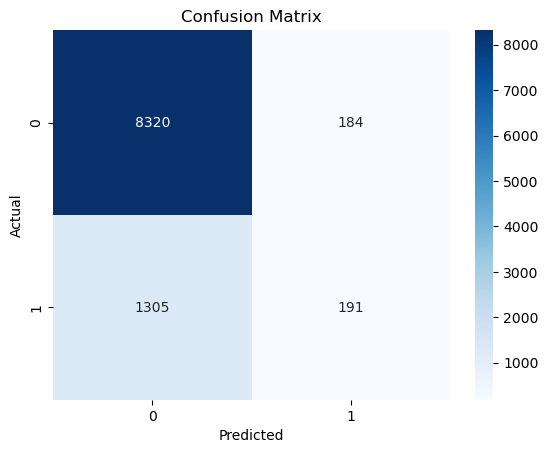

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



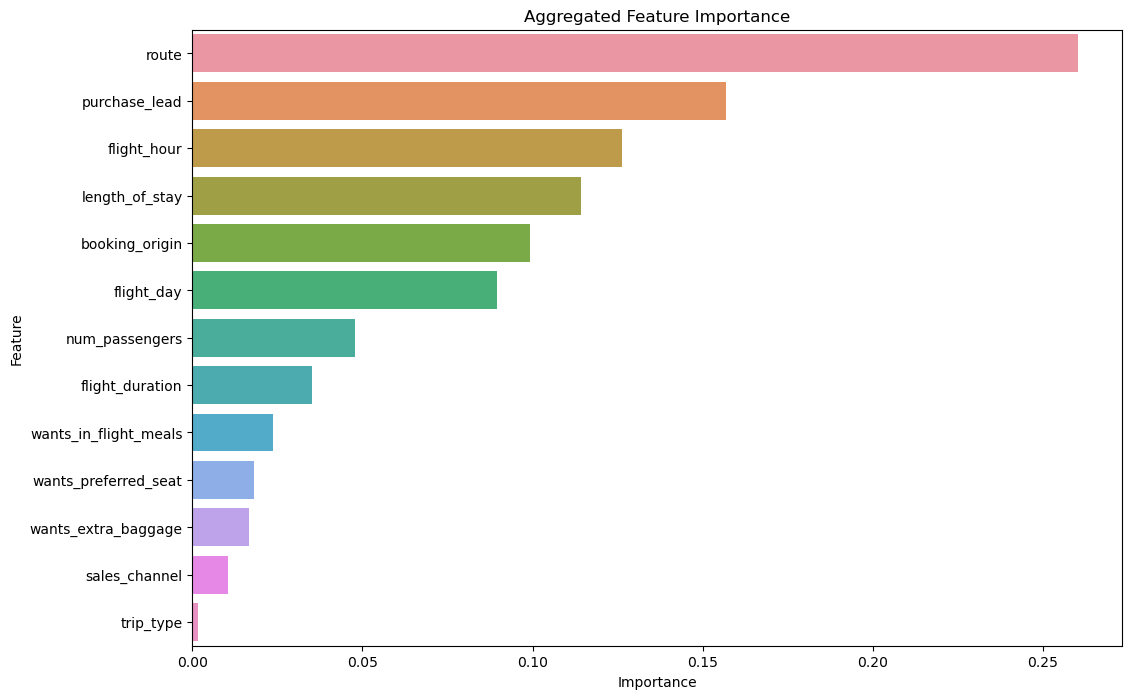

In [60]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Map feature importances back to original features
original_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'sales_channel', 'trip_type', 'route', 'booking_origin']
aggregated_importances = []

for feature in original_features:
    if feature in importance_df['Feature'].values:
        aggregated_importances.append({'Feature': feature, 'Importance': importance_df[importance_df['Feature'] == feature]['Importance'].sum()})
    else:
        # Sum the importances of one-hot encoded features
        importance_sum = importance_df[importance_df['Feature'].str.startswith(feature)].sum()['Importance']
        aggregated_importances.append({'Feature': feature, 'Importance': importance_sum})

# Create a DataFrame for aggregated importances
aggregated_importance_df = pd.DataFrame(aggregated_importances).sort_values(by='Importance', ascending=False)

# Plot aggregated feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=aggregated_importance_df)
plt.title('Aggregated Feature Importance')
plt.show()